# Jamboree Education - Linear Regression

## Context

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


## Objective / Problem statement

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

#stats model library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hypothesis testing library
from scipy.stats import shapiro

# math library
import math 

In [5]:
# load Jamboree education data
df = pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

## Target /  dependent feature - 'Chance of Admit'
### Independent feature -  'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',  'LOR ', 'CGPA', 'Research'

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### Null values are not present

In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

-  GRE score as hightest mean value
- Mean of Chance of Admit is 0.72

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### All features data type are numeric

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Univarient analysis

In [31]:
col = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
for i in col:
    print('Unique values of',i, 'column =', df[i].nunique())
    print('-----------------------------------------------')

Unique values of GRE Score column = 49
-----------------------------------------------
Unique values of TOEFL Score column = 29
-----------------------------------------------
Unique values of University Rating column = 5
-----------------------------------------------
Unique values of SOP column = 9
-----------------------------------------------
Unique values of LOR  column = 9
-----------------------------------------------
Unique values of CGPA column = 184
-----------------------------------------------
Unique values of Research column = 2
-----------------------------------------------
Unique values of Chance of Admit  column = 61
-----------------------------------------------


## Unique value counts
 - University Rating --> 3 as highest rating
 - SOP --> 4 as highest rating
 - LOR --> 3 as highest rating
 - Research --> 1 is majority/

In [140]:
col = ['University Rating', 'SOP', 'LOR ', 'Research']
for i in col:
    print('Unique values of',i, 'column')
    print((df[i].value_counts()/df.shape[0]) * 100)
    print('-----------------------------------------------')

Unique values of University Rating column
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64
-----------------------------------------------
Unique values of SOP column
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: SOP, dtype: float64
-----------------------------------------------
Unique values of LOR  column
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: LOR , dtype: float64
-----------------------------------------------
Unique values of Research column
1    56.0
0    44.0
Name: Research, dtype: float64
-----------------------------------------------


## Histogram

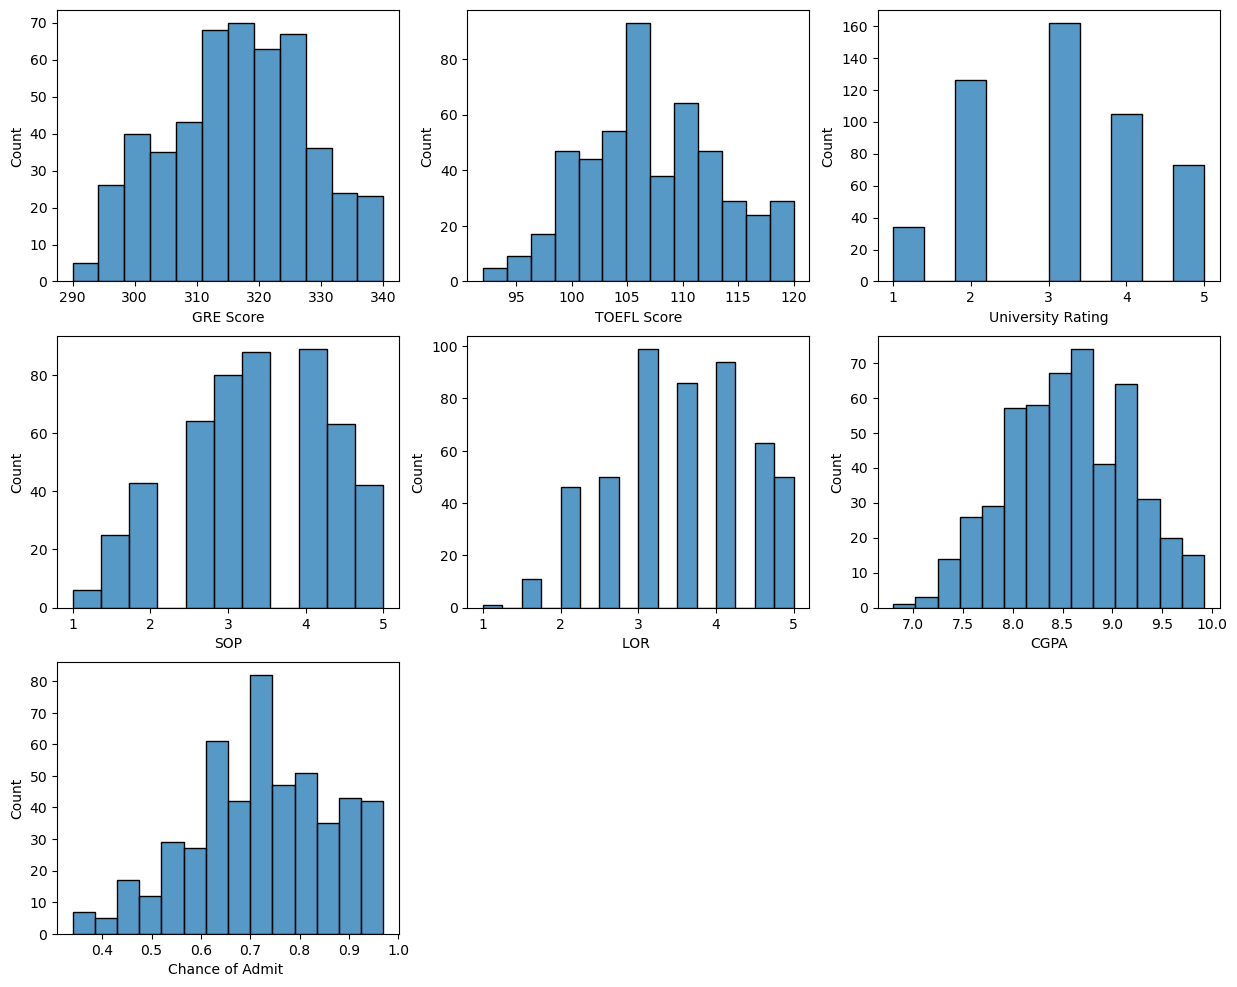

In [101]:
col = df.columns.drop (['Serial No.','Research'])
fig, ax = plt.subplots(3,3, figsize = (15,12))
ax[2,1].set_axis_off()
ax[2,2].set_axis_off()
c = 0
for i in range(3):
    for j in range(3):
        if i == 2 and  j==1:
            break
        sns.histplot(ax = ax[i,j], x = df[col[c]])
        c = c+1

## Outlier detection
 - LOR and Chance of admit features as few outliers and remaining features doesnt have outlier

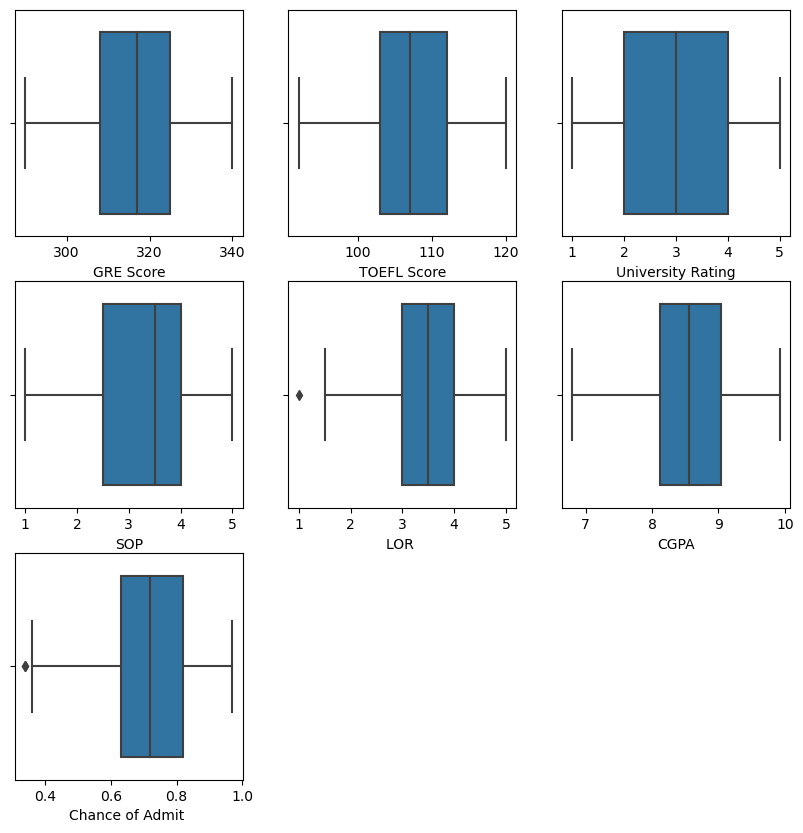

In [88]:
col = df.columns.drop (['Serial No.','Research'])
fig, ax = plt.subplots(3,3, figsize = (10,10))
ax[2,1].set_axis_off()
ax[2,2].set_axis_off()
c = 0
for i in range(3):
    for j in range(3):
        if i == 2 and  j==1:
            break
        sns.boxplot(ax = ax[i,j], x = df[col[c]])
        c = c+1


## Bivariate Analysis

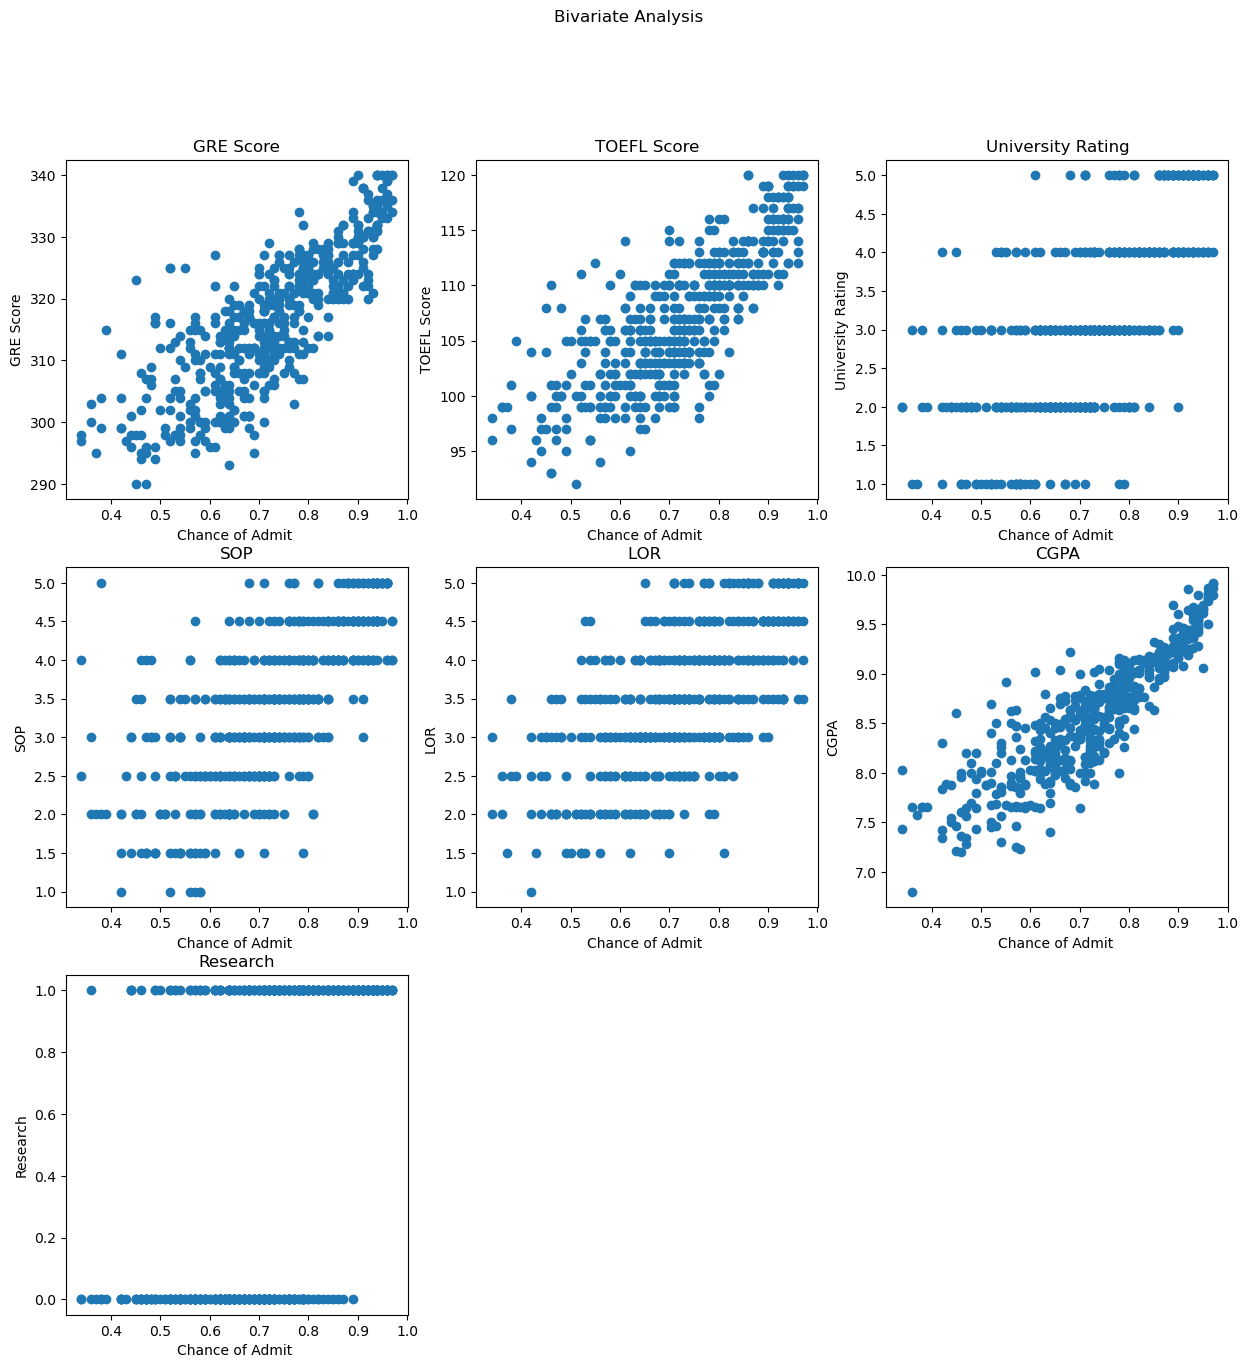

In [134]:
col = df.columns.drop (['Serial No.', 'Chance of Admit '])
fig, ax = plt.subplots(3,3, figsize = (15,15))
fig.suptitle('Bivariate Analysis')
ax[2,1].set_axis_off()
ax[2,2].set_axis_off()
c = 0

for i in range(3):
    for j in range(3):
        if i == 2 and  j==1:
            break
        ax[i,j].scatter(x = df['Chance of Admit '], y = df[col[c]])
        ax[i,j].set_xlabel("Chance of Admit ")
        ax[i,j].set_ylabel(col[c])
        ax[i,j].set_title(col[c])
        c = c +1

#### Bivariate insights :
    - Independent features are linear correlated to Target features as per above scatter plot

<Axes: >

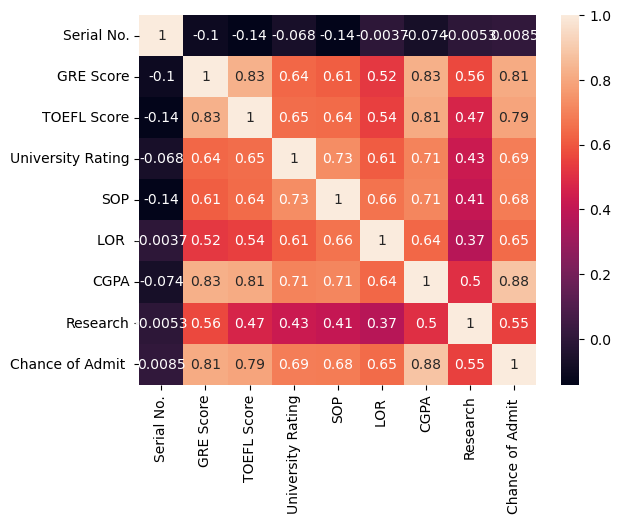

In [135]:
sns.heatmap(df.corr(method='pearson'), annot=True)

#### Heatmap insights :
    - Independent features are linear correlated to Target features

## Linear regression Assumption checking

In [184]:
data = df.drop(columns = ['Serial No.'])
col_names = data.columns

# scale the model for checking assumption
scale = StandardScaler()
data_scale = scale.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns = col_names)
X_asm_sc = data_scale.drop(columns = ['Chance of Admit '])
y_asm_sc = data_scale['Chance of Admit ']

### Multicollinearity check by VIF score
 - As per Vif values of each column there are not multicolinearity between independent columns as  All VIF values as below 5.

In [185]:
# create dataframe to VIF values
vif = pd.DataFrame()

# create features column for comparision
vif['Features'] = X_asm_sc.columns

# create VIF values for all independent columns - GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA,'Research'
vif['Vif values'] = [variance_inflation_factor(X_asm_sc.values, i) for i in range(X_asm_sc.shape[1])]

# round values
vif['Vif values'] = round(vif['Vif values'],2)

# sort by values in decending order
vif= vif.sort_values(by ='Vif values', ascending = False )
vif

,Features,Vif values
5,CGPA,4.78
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.84
2,University Rating,2.62
4,LOR,2.03
6,Research,1.49


### Error should be normal distributed
 - As per checking with graphical and non graphical given data's error is not normally distributed
 - Error is left skewed.

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          8.21e-180
Time:                        19:55:23   Log-Likelihood:                -278.12
No. Observations:                 500   AIC:                             572.2
Df Residuals:                     492   BIC:                             605.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.322e-16      0.01

<Axes: ylabel='Count'>

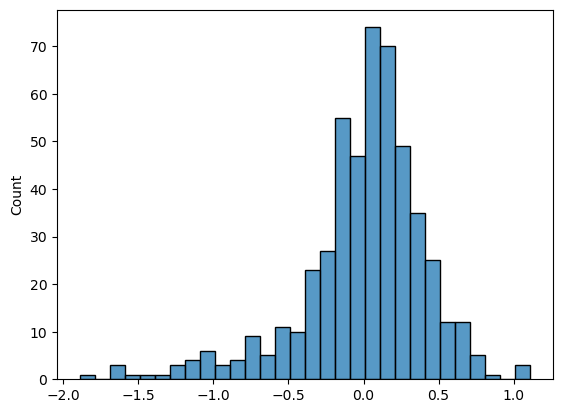

In [190]:
# adding intercept values to data frame when we run OLS model from Statsmodels library
X_ecc = sm.add_constant(X_asm_sc)

# Train the model
sm_model = sm.OLS(y_asm_sc, X_ecc).fit()

# Get results
print(sm_model.summary())

# get y_prediction values
y_pre = sm_model.predict(X_ecc)

# Error = y - y_pre
errors = sm_model.resid

# plot histogram
sns.histplot(errors)

In [193]:
# Shapiro test to check normallity of errors
# null hypothesis - data is normally distributed
# Alternate hypothesis -  data is not normally distributed
# signigicance level, alpha = 0.05
alp = 0.05 # alpha value
statistic , p_value = shapiro(errors)

if p_value > alp:
    print(f'Pvalue : {p_value}')
    print('Errors is normally distributed')
else:
    print(f'Pvalue : {p_value}')
    print('Errors is not normally distributed')

Pvalue : 4.826223479832605e-15
Errors is not normally distributed


### Checking for Heteroscedasticity
    - As  per below plot, errors looks like having heteriscedasticity
    - As per mean of residual = values is almost zero but required '0'

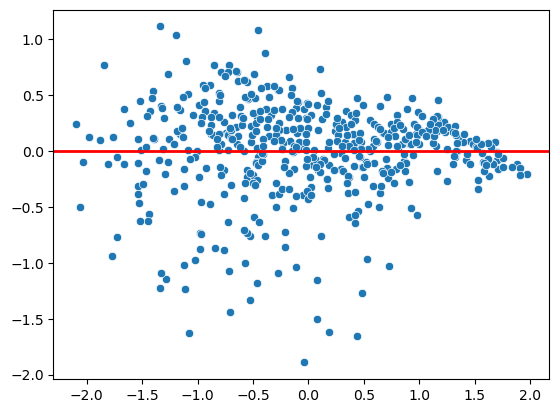

In [199]:
heter = sns.scatterplot(x = y_pre, y = errors)
heter.axhline(0, color = 'red', linewidth = 2)
plt.show()

In [200]:
# mean of residual
errors.mean()

-1.971756091734278e-15

## ------------------------------------------------------------------------------------------------------

## Split data - Train and Test

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_asm_sc, y_asm_sc, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

## ------------------------------------------------------------------------------------------------------

## Linear regression by stats model
    - Train data:
        - R2 and Adj R2 score are 0.822 and 0.818 respectively 
        - SOP and University Rating columns probability is more than 0.05. Where feature is not important as Null hypothesis testing.
        - GRE Score, TOEFL Score, LOR, CGPA and Research features are important as per probability values.
        - 95 percentile values lie in the range for each column mentioned.
 --------------------------------------------------------------------------------------------------       
    - Test data:
        - R2 and Adj R2 score are 0.82 and 0.81 respectively 
        - MAE score test : 0.29
        - RMSE score test : 0.42
 
---------------------------------------------------------------------------------------------------
 - Model prediction is almost same in Train and Test data. so model is best fit
  ---------------------------------------------------------------
  - Adjusted R2 score is about 0.81
  - R2 score is about 0.8 ~ 0.82
  - Model is predicts 80% coinfident

In [203]:
# by Stats model- Linear regression
sm_X_train = sm.add_constant(X_train)
sm_model_train = sm.OLS(y_train,sm_X_train).fit()

# summary
print(sm_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          2.10e-142
Time:                        20:32:32   Log-Likelihood:                -224.33
No. Observations:                 400   AIC:                             464.7
Df Residuals:                     392   BIC:                             496.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0081      0.02

In [268]:
# with test data checking 
sm_X_test = sm.add_constant(X_test)
sm_y_pre = sm_model_train.predict(sm_X_test)

# R2 score
r2_test = r2_score(y_test, sm_y_pre)
print(f'R2 score test : {round(r2_test,2)}')

# adjusted R2 score
adj_r2 = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R2 score test : {round(adj_r2,2)}')     

# MAE
mae_sm = mean_absolute_error(y_test, sm_y_pre)
print(f'MAE score test : {round(mae_sm,2)}')

# RMSE
rmse_sm = mean_squared_error(y_test, sm_y_pre)
print(f'RMSE score test : {round(math.sqrt(rmse_sm),2)}')

R2 score test : 0.82
Adjusted R2 score test : 0.81
MAE score test : 0.29
RMSE score test : 0.42


## -------------------------------------------------------------------------------------------------

### L1 / Lasso Regularization Regression 
### L2 / Ridge Regularization Regression 

#### L1/Lasso Regularization regresson
 - Train :
     - R2 score = 0.8
     - Adjusted R2 score = 0.78
     - MAE score train : 0.3
     - RMSE score train : 0.42
 - Test :
     - R2 score = 0.82
     - Adjusted R2 score = 0.81
     - MAE score test : 0.29
     - RMSE score test : 0.42
     
  ---------------------------------------------------------------
  - Adjusted R2 score is about 0.81
  - R2 score is about 0.8 ~ 0.8
  - Model is predicts 80% coinfident

In [266]:
# L1 / Lasso Regularization Regression 
def ploy_scale(degree=2, alpha=1.0):
    return make_pipeline(PolynomialFeatures(degree), Lasso(alpha = alpha))

param_grid = {'polynomialfeatures__degree': np.arange(1,5), 'lasso__alpha' : [0.01, 0.1, 1 ,1.5, 10]}
lasso_r2 = GridSearchCV(estimator = ploy_scale(), param_grid = param_grid, cv = KFold(n_splits = 5), scoring = 'r2')

# train
lasso_r2.fit(X_train, y_train)

# best degree and alpha
print(lasso_r2.best_params_)

# R2 score
print(f'R2 score for train data :{round(lasso_r2.best_score_,2)}')

# adjusted R2 score
adj_r2_lasso_train = 1 - (1-lasso_r2.best_score_)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R2 score train : {round(adj_r2_lasso_train,2)}')    

# MAE
y_pre_lasso_train = lasso_r2.predict(X_train)
mae_lasso = mean_absolute_error(y_train, y_pre_lasso_train)
print(f'MAE score train : {round(mae_lasso,2)}')

# RMSE
rmse_lasso = mean_squared_error(y_train, y_pre_lasso_train)
print(f'RMSE score train : {round(math.sqrt(rmse_lasso),2)}')

{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 1}
R2 score for train data :0.8
Adjusted R2 score train : 0.78
MAE score train : 0.3
RMSE score train : 0.42


In [265]:
# Test data
y_pre_lasso = lasso_r2.predict(X_test)

# r2 score
r2_test_lasso = r2_score(y_test, y_pre_lasso)
print(f'R2 score test : {round(r2_test_lasso,2)}')

# adjusted R2 score
adj_r2_lasso = 1 - (1-r2_test_lasso)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R2 score test : {round(adj_r2_lasso,2)}')    

# MAE
mae_lasso = mean_absolute_error(y_test, y_pre_lasso)
print(f'MAE score test : {round(mae_lasso,2)}')

# RMSE
rmse_lasso = mean_squared_error(y_test, y_pre_lasso)
print(f'RMSE score test : {round(math.sqrt(rmse_lasso),2)}')

R2 score test : 0.82
Adjusted R2 score test : 0.81
MAE score test : 0.29
RMSE score test : 0.42


#### L2 / Ridge Regularization regresson
 - Train :
     - R2 score = 0.8 
     - Ajusted R2 score = 0.79
     - MAE score train : 0.3
     - RMSE score train : 0.43
 - Test :
     - R2 score = 0.82
     - Ajusted R2 score = 0.8
     - MAE score test : 0.29
     - RMSE score test : 0.42
  ---------------------------------------------------------------
  - Adjusted R2 score is about 0.8
  - R2 score is about 0.8 ~ 0.82
  - Model is predicts 80% coinfident
  

In [267]:
# L2 / Ridge Regularization Regression 
def ploy_scale(degree=2, alpha=1.0):
    return make_pipeline(PolynomialFeatures(degree), Ridge(alpha = alpha))

param_grid = {'polynomialfeatures__degree': np.arange(1,5), 'ridge__alpha' : [0.01, 0.1, 1 ,1.5, 10, 20]}
ridge_r2 = GridSearchCV(estimator = ploy_scale(), param_grid = param_grid, cv = KFold(n_splits = 5), scoring = 'r2')

# train
ridge_r2.fit(X_train, y_train)

# best degree and alpha
print(ridge_r2.best_params_)

# R2 score
print(f'R2 score for train data :{round(ridge_r2.best_score_,2)}')

# adjusted r2 score
adj_r2_ridge_train = 1 - (1-ridge_r2.best_score_)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R2 score test : {round(adj_r2_ridge_train,2)}')   

# MAE
y_pre_ridge_train = ridge_r2.predict(X_train)
mae_ridge = mean_absolute_error(y_train, y_pre_ridge_train)
print(f'MAE score train : {round(mae_ridge,2)}')

# RMSE
rmse_ridge = mean_squared_error(y_train, y_pre_ridge_train)
print(f'RMSE score train : {round(math.sqrt(rmse_ridge),2)}')

{'polynomialfeatures__degree': 1, 'ridge__alpha': 20}
R2 score for train data :0.8
Adjusted R2 score test : 0.79
MAE score train : 0.3
RMSE score train : 0.43


In [261]:
# Test data
y_pre_ridge = ridge_r2.predict(X_test)

# r2 score
r2_test_ridge = r2_score(y_test, y_pre_ridge)
print(f'R2 score test : {round(r2_test_lasso,2)}')

# adjusted R2 score
adj_r2_ridge = 1 - (1-r2_test_ridge)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R2 score test : {round(adj_r2_ridge,2)}')   

# MAE
mae_ridge = mean_absolute_error(y_test, y_pre_ridge)
print(f'MAE score test : {round(mae_ridge,2)}')

# RMSE
rmse_ridge = mean_squared_error(y_test, y_pre_ridge)
print(f'RMSE score test : {round(math.sqrt(rmse_ridge),2)}')

R2 score test : 0.82
Adjusted R2 score test : 0.8
MAE score test : 0.29
RMSE score test : 0.42


## Insights :
    - By all 3 methods, test R2 score -> 0.8 ~ 0.82
    - Model is with best fit
    - SOP and University Rating columns probability is more than 0.05. Where feature is not important as Null hypothesis testing.
    - GRE Score, TOEFL Score, LOR, CGPA and Research features are important as per probability values.
    - CGPA is more importanct when compared to other features.

## Recommendations

 - for Admition to university - CGPA, GRE and Toefl scores - these are to be seen where student will get selected not.
 - Additional training / coaching for these exam CGPA, GRE and Toefl- changes of getting selsction will increase.
 - Remaining features like SOP, University rating, LOR and research experience will add advantage if available
 - If any student is interesed in Research, provide intership opporunity with companies.
 - Share list of university list for students, so students can prepare for clearing exams.

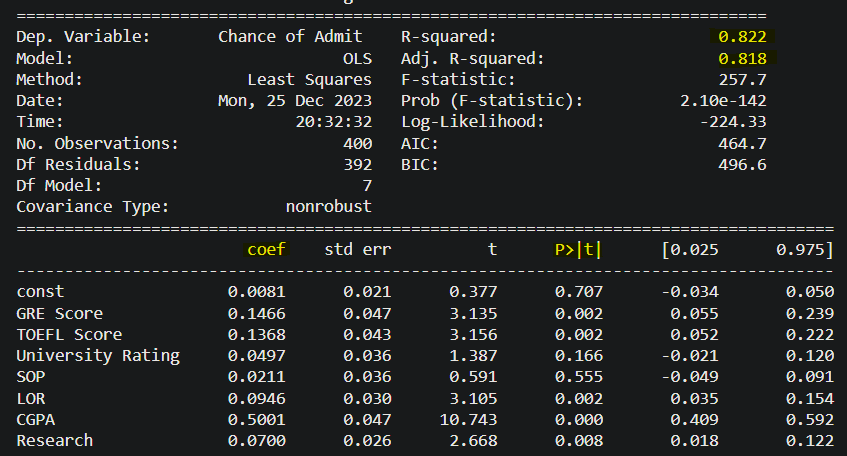